### Load and process review dataset

For this assignment, we will use the same subset of the Amazon product review dataset that we used in Module 3 assignment. The subset was chosen to contain similar numbers of positive and negative reviews, as the original dataset consisted of mostly positive reviews.

Load the dataset into a data frame named products.

Just like we did previously, we will work with a hand-curated list of important words extracted from the review data. We will also perform 2 simple data transformations:

 *   Remove punctuation
 *   Compute word counts (only for the important_words)

In [1]:
import pandas as pd
import numpy as np

products = pd.read_csv('amazon_baby_subset.csv')
products.head(10)

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1
6,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,"Try this out for a spring project !Easy ,fun a...",5,1
7,Blessed By Pope Benedict XVI Divine Mercy Full...,very nice Divine Mercy Pendant of Jesus now on...,5,1
8,Cloth Diaper Pins Stainless Steel Traditional ...,We bought the pins as my 6 year old Autistic s...,4,1
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1


In [2]:
import json
important_words = json.loads(open('important_words.json').read())

We start with the first item as follows:

  *  If your tool supports it, fill n/a values in the review column with empty strings. The n/a values indicate empty reviews. For instance, Pandas's the fillna() method lets you replace all N/A's in the review columns as follows:

In [3]:
products = products.fillna({'review':''})  # fill in N/A's in the review column

* Write a function remove_punctuation that takes a line of text and removes all punctuation from that text. The function should be analogous to the following Python code:

In [4]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator) 

* Apply the remove_punctuation function on every element of the review column and assign the result to the new column review_clean. Note. Many data frame packages support apply operation for this type of task. Consult appropriate manuals.

In [5]:
products['review_clean'] = products['review'].apply(remove_punctuation)
products.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...


Now we proceed with the second item. For each word in important_words, we compute a count for the number of times the word occurs in the review. We will store this count in a separate column (one for each word). The result of this feature processing is a single column for each word in important_words which keeps a count of the number of times the respective word occurs in the review text.

Note: There are several ways of doing this. One way is to create an anonymous function that counts the occurrence of a particular word and apply it to every element in the review_clean column. Repeat this step for every word in important_words. Your code should be analogous to the following:

In [6]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [7]:
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train-Validation split

We split the data into a train-validation split with 80% of the data in the training set and 20% of the data in the validation set. We use seed=2 so that everyone gets the same result. Call the training and validation sets train_data and validation_data, respectively.

Note: In previous assignments, we have called this a train-test split. However, the portion of data that we don't train on will be used to help select model parameters (this is known as model selection). Thus, this portion of data should be called a validation set. Recall that examining performance of various potential models (i.e. models with different parameters) should be on validation set, while evaluation of the final selected model should always be on test data. Typically, we would also save a portion of the data (a real test set) to test our final model on or use cross-validation on the training set to select our final model. But for the learning purposes of this assignment, we won't do that. 

In [8]:
train_data_index = json.loads(open('module-4-assignment-train-idx.json').read())
valid_data_index = json.loads(open('module-4-assignment-validation-idx.json').read())

In [9]:
train_data = products.iloc[train_data_index]
valid_data = products.iloc[valid_data_index]
train_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1,Beautiful book I love it to record cherished t...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Convert data frame to multi-dimensional array

onvert train_data and validation_data into multi-dimensional arrays.

Using the function given in Module 3 assignment, extract two arrays feature_matrix_train and sentiment_train from train_data. The 2D array feature_matrix_train would contain the content of the columns given by the list important_words. The 1D array sentiment_train would contain the content of the column sentiment. Do the same for validation_data, producing the arrays feature_matrix_valid and sentiment_valid. The code should be analogous to this cell:

In [10]:
def get_numpy_data(data_frame, features, label):
    data_frame['constant'] = 1 # add a constant column to an DataFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features

    features_dataframe = data_frame[features]

    features_matrix = features_dataframe.as_matrix()
 
    label_dataframe = data_frame[label]
    label_array = label_dataframe.as_matrix()

    return(features_matrix, label_array)

In [11]:
(feature_matrix_train, sentiment_train) = get_numpy_data(train_data, important_words, 'sentiment')
(feature_matrix_valid, sentiment_valid) = get_numpy_data(valid_data, important_words, 'sentiment') 

/home/qiangwennorge/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Building on logistic regression with no L2 penalty assignment

Let us now build on the assignment of the previous module. Recall from lecture that the link function for logistic regression can be defined as:

$P(yi=+1|xi,w)=11+exp(−w⊺h(xi))$,

where the feature vector h(xi) is given by the word counts of important_words in the review xi.

We will use the same code as in this past assignment to make probability predictions since this part is not affected by the L2 penalty. (Only the way in which the coefficients are learned is affected by the addition of a regularization term.) Refer to #10 of Module 3 assignment in order to obtain the function predict_probability.


In [12]:
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    
    predictions = 1.0 / (1.0 + np.exp(-score))
    
    # return predictions
    return(predictions)

### Adding L2 penalty

Let us now work on extending logistic regression with an L2 penalty. As discussed in the lectures, the L2 regularization is particularly useful in preventing overfitting. In this assignment, we will explore L2 regularization in detail.

Recall from lecture and the previous assignment that for logistic regression without an L2 penalty, the derivative of the log-likelihood function is:

$∂ℓ∂wj=∑i=1Nhj(xi)(1[yi=+1]−P(yi=+1|xi,w))$

### Adding L2 penalty to the derivative

It takes only a small modification to add a L2 penalty. All terms indicated in red refer to terms that were added due to an L2 penalty.

 *   Recall from the lecture that the link function is still the sigmoid:

$P(yi=+1|xi,w)=11+exp(−w⊺h(xi))$

 *   We add the L2 penalty term to the per-coefficient derivative of log likelihood:

$∂ℓ∂wj=∑i=1Nhj(xi)(1[yi=+1]−P(yi=+1|xi,w))−2λwj$

The per-coefficient derivative for logistic regression with an L2 penalty is as follows:

$∂ℓ∂wj=∑i=1Nhj(xi)(1[yi=+1]−P(yi=+1|xi,w))−2λwj$

and for the intercept term, we have

$∂ℓ∂w0=∑i=1Nh0(xi)(1[yi=+1]−P(yi=+1|xi,w))$

Write a function that computes the derivative of log likelihood with respect to a single coefficient w_j. Unlike its counterpart in the last assignment, the function accepts five parameters:

  *  errors: vector whose i-th value contains

$1[yi=+1]−P(yi=+1|xi,w)$

  *  feature: vector whose i-th value contains

$hj(xi)$

 *   coefficient: the current value of the j-th coefficient.
 *   l2_penalty: the L2 penalty constant λ
 *   feature_is_constant: a Boolean value indicating whether the j-th feature is constant or not.

The function should do the following:

 *   Take the five parameters as above.
 *   Compute the dot product of errors and feature and save the result to derivative.
 *   If feature_is_constant is False, subtract the L2 penalty term from derivative. Otherwise, do nothing.
 *   Return derivative.

In [13]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    
    derivative = np.dot(errors, feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        
        derivative -= 2 * l2_penalty * coefficient
        
    return(derivative)

# Question 1
In the function feature_derivative_with_L2, was the intercept term regularized?

* No

To verify the correctness of the gradient descent algorithm, we write a function for computing log likelihood (which we recall from the last assignment was a topic detailed in an advanced optional video, and used here for its numerical stability), which is given by the formula

$ℓℓ(w)=∑i=1N((1[yi=+1]−1)w⊺h(wi)−ln(1+exp(−w⊺h(xi))))−λ∥w∥22$

The function should be analogous to the following Python function: 

In [14]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return(lp)

# Question 2
Does the term with L2 regularization increase or decrease the log likelihood ℓℓ(w)? 

* Decrease

The logistic regression function looks almost like the one in the last assignment, with a minor modification to account for the L2 penalty.

Write a function logistic_regression_with_L2 to fit a logistic regression model under L2 regularization.

The function accepts the following parameters:

  *  feature_matrix: 2D array of features
  *  sentiment: 1D array of class labels
  *  initial_coefficients: 1D array containing initial values of coefficients
  *  step_size: a parameter controlling the size of the gradient steps
  *  l2_penalty: the L2 penalty constant λ
  *  max_iter: number of iterations to run gradient ascent

The function returns the last set of coefficients after performing gradient ascent.

The function carries out the following steps:

  *  Initialize vector coefficients to initial_coefficients.
  *  Predict the class probability P(yi=+1|xi,w) using your predict_probability function and save it to variable predictions.
  *  Compute indicator value for (yi=+1) by comparing sentiment against +1. Save it to variable indicator.
  *  Compute the errors as difference between indicator and predictions. Save the errors to variable errors.
  *  For each j-th coefficient, compute the per-coefficient derivative by calling feature_derivative_L2 with the j-th column of feature_matrix. Don't forget to supply the L2 penalty. Then increment the j-th coefficient by (step_size*derivative).
  *  Once in a while, insert code to print out the log likelihood.
  *  Repeat steps 2-6 for max_iter times.

At the end of day, your code should be analogous to the following Python function (with blanks filled in):

In [15]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function

        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            
            coefficients[j] += step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return(coefficients)

### Explore effects of L2 regularization

Now that we have written up all the pieces needed for an L2 solver with logistic regression, let's explore the benefits of using L2 regularization while analyzing sentiment for product reviews. As iterations pass, the log likelihood should increase.

Let us train models with increasing amounts of regularization, starting with no L2 penalty, which is equivalent to our previous logistic regression implementation. Train 6 models with L2 penalty values 0, 4, 10, 1e2, 1e3, and 1e5. Use the following values for the other parameters:

 *   feature_matrix = feature_matrix_train extracted in #7
 *   sentiment = sentiment_train extracted in #7
 *   initial_coefficients = a 194-dimensional vector filled with zeros
 *   step_size = 5e-6
 *   max_iter = 501

Save the 6 sets of coefficients as coefficients_0_penalty, coefficients_4_penalty, coefficients_10_penalty, coefficients_1e2_penalty, coefficients_1e3_penalty, and coefficients_1e5_penalty respectively.

In [17]:
initial_coefficients = np.zeros(194)
step_size = 5e-6
max_iter = 501

In [18]:
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, 0, max_iter)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [19]:
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, 4, max_iter)

iteration   0: log likelihood of observed labels = -29179.39508175
iteration   1: log likelihood of observed labels = -29003.73417180
iteration   2: log likelihood of observed labels = -28834.71441858
iteration   3: log likelihood of observed labels = -28671.80345068
iteration   4: log likelihood of observed labels = -28514.58077957
iteration   5: log likelihood of observed labels = -28362.69830317
iteration   6: log likelihood of observed labels = -28215.85663259
iteration   7: log likelihood of observed labels = -28073.79071393
iteration   8: log likelihood of observed labels = -27936.26093762
iteration   9: log likelihood of observed labels = -27803.04751805
iteration  10: log likelihood of observed labels = -27673.94684207
iteration  11: log likelihood of observed labels = -27548.76901327
iteration  12: log likelihood of observed labels = -27427.33612958
iteration  13: log likelihood of observed labels = -27309.48101569
iteration  14: log likelihood of observed labels = -27195.0462

In [20]:
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, 10, max_iter)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29003.76654163
iteration   2: log likelihood of observed labels = -28834.79322654
iteration   3: log likelihood of observed labels = -28671.94687528
iteration   4: log likelihood of observed labels = -28514.80571589
iteration   5: log likelihood of observed labels = -28363.02048079
iteration   6: log likelihood of observed labels = -28216.29071186
iteration   7: log likelihood of observed labels = -28074.35036891
iteration   8: log likelihood of observed labels = -27936.95892966
iteration   9: log likelihood of observed labels = -27803.89576265
iteration  10: log likelihood of observed labels = -27674.95647005
iteration  11: log likelihood of observed labels = -27549.95042714
iteration  12: log likelihood of observed labels = -27428.69905549
iteration  13: log likelihood of observed labels = -27311.03455140
iteration  14: log likelihood of observed labels = -27196.7989

In [22]:
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, 1e2, max_iter)

iteration   0: log likelihood of observed labels = -29179.48385120
iteration   1: log likelihood of observed labels = -29004.25177457
iteration   2: log likelihood of observed labels = -28835.97382190
iteration   3: log likelihood of observed labels = -28674.09410083
iteration   4: log likelihood of observed labels = -28518.17112932
iteration   5: log likelihood of observed labels = -28367.83774654
iteration   6: log likelihood of observed labels = -28222.77708939
iteration   7: log likelihood of observed labels = -28082.70799392
iteration   8: log likelihood of observed labels = -27947.37595368
iteration   9: log likelihood of observed labels = -27816.54738615
iteration  10: log likelihood of observed labels = -27690.00588850
iteration  11: log likelihood of observed labels = -27567.54970126
iteration  12: log likelihood of observed labels = -27448.98991327
iteration  13: log likelihood of observed labels = -27334.14912742
iteration  14: log likelihood of observed labels = -27222.8604

In [21]:
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, 1e3, max_iter)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29009.07176112
iteration   2: log likelihood of observed labels = -28847.62378912
iteration   3: log likelihood of observed labels = -28695.14439397
iteration   4: log likelihood of observed labels = -28550.95060743
iteration   5: log likelihood of observed labels = -28414.45771129
iteration   6: log likelihood of observed labels = -28285.15124375
iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.4242

In [23]:
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, 1e5, max_iter)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.71006589
iteration   2: log likelihood of observed labels = -29271.65738833
iteration   3: log likelihood of observed labels = -29271.61189923
iteration   4: log likelihood of observed labels = -29271.57079975
iteration   5: log likelihood of observed labels = -29271.53358505
iteration   6: log likelihood of observed labels = -29271.49988440
iteration   7: log likelihood of observed labels = -29271.46936584
iteration   8: log likelihood of observed labels = -29271.44172890
iteration   9: log likelihood of observed labels = -29271.41670149
iteration  10: log likelihood of observed labels = -29271.39403722
iteration  11: log likelihood of observed labels = -29271.37351294
iteration  12: log likelihood of observed labels = -29271.35492661
iteration  13: log likelihood of observed labels = -29271.33809523
iteration  14: log likelihood of observed labels = -29271.3228

### Compare coefficients

We now compare the coefficients for each of the models that were trained above. Create a table of features and learned coefficients associated with each of the different L2 penalty values.

Using the coefficients trained with L2 penalty 0, find the 5 most positive words (with largest positive coefficients). Save them to positive_words. Similarly, find the 5 most negative words (with largest negative coefficients) and save them to negative_words. 

In [31]:
coefficients_table = pd.DataFrame({'word': ['(intercept)'] + important_words})
def add_coefficients_to_table(coefficients, column_name):
    coefficients_table[column_name] = coefficients
    return(coefficients_table)

add_coefficients_to_table(coefficients_0_penalty, 'coefficients L2 penalty 0')
add_coefficients_to_table(coefficients_4_penalty, 'coefficients L2 penalty 4')
add_coefficients_to_table(coefficients_10_penalty, 'coefficients L2 penalty 10')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients L2 penalty 1e2')
add_coefficients_to_table(coefficients_1e3_penalty, 'coefficients L2 penalty 1e3')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients L2 penalty 1e5')
coefficients_table.head()

,word,coefficients L2 penalty 0,coefficients L2 penalty 4,coefficients L2 penalty 10,coefficients L2 penalty 1e2,coefficients L2 penalty 1e3,coefficients L2 penalty 1e5
0,(intercept),-0.063742,-0.063143,-0.062256,-0.050438,0.000054,0.011362
1,baby,0.074073,0.073994,0.073877,0.072360,0.059752,0.001784
2,one,0.012753,0.012495,0.012115,0.007247,-0.008761,-0.001827
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042


In [37]:
positive_words = coefficients_table.sort_values(by = ['coefficients L2 penalty 0'], ascending = False)['word'][:5]
negative_words = coefficients_table.sort_values(by = ['coefficients L2 penalty 0'], ascending = False)['word'][-5:]

# Question 3
Which of the following words is not listed in either positive_words or negative_words? 

In [40]:
positive_words.tolist()

['love', 'loves', 'easy', 'perfect', 'great']

In [41]:
negative_words.tolist()

['returned', 'waste', 'return', 'money', 'disappointed']

Let us observe the effect of increasing L2 penalty on the 10 words just selected. Make a plot of the coefficients for the 10 words over the different values of L2 penalty.

Hints:

  *  First, extract rows corresponding to positive_words. Do the same for negative_words.
  *  Then plot each of the extracted rows. The x axis should be L2 penalty and the y axis should be the coefficient value.
  *  Use log scale for the x axis, as the L2 penalty values are exponentially spaced.

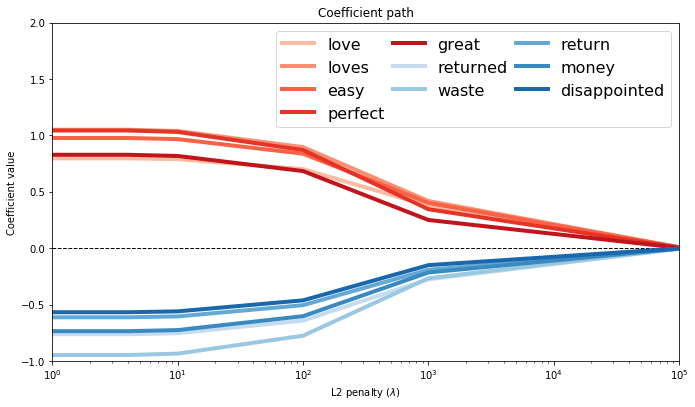

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].as_matrix().flatten(),'-', label=positive_words.tolist()[i], linewidth=4.0, color=color)
    
    
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].as_matrix().flatten(),
                 '-', label=negative_words.tolist()[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()
    
make_coefficient_plot(coefficients_table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

# Question 4
Questions 4 and 5 use the coefficient plot of the words in positive_words and negative_words.

(True/False) All coefficients consistently get smaller in size as the L2 penalty is increased. 

* True

# Question 5
Questions 4 and 5 use the coefficient plot of the words in positive_words and negative_words.

(True/False) The relative order of coefficients is preserved as the L2 penalty is increased. (For example, if the coefficient for 'cat' was more positive than that for 'dog', this remains true as the L2 penalty increases.)

* False

### Measuring accuracy

Now, let us compute the accuracy of the classifier model. Recall that the accuracy is given by

accuracy=# correctly classified data points / # total data points

Recall from lecture that that the class prediction is calculated using

$y^i=+1if h(xi)⊺w>0−1if h(x)i⊺w≤0$

Note: It is important to know that the model prediction code doesn't change even with L2 penalty. The only thing that changes is that the estimated coefficients used in this prediction are different with L2 penalty.

In [67]:
def predict_func(score):
    if score > 0:
        predict = 1
    else:
        predict = -1
    return(predict)

def accuracy_calculation(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    sentiment_prediction = pd.Series(scores).apply(predict_func).tolist()
    correct_classified_num = list(sentiment == sentiment_prediction).count(True)
    
    accuracy = correct_classified_num / sentiment.shape[0] * 1.0
    
    return(accuracy)

In [68]:
l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5]
coefficients_list = [coefficients_0_penalty, coefficients_4_penalty, coefficients_10_penalty, coefficients_1e2_penalty, coefficients_1e3_penalty, coefficients_1e5_penalty]
train_accuracy = {l2_penalty:accuracy_calculation(feature_matrix_train, sentiment_train, coefficients) for l2_penalty, coefficients in zip(l2_penalty_list, coefficients_list)}

# Question 6
Questions 6, 7, and 8 ask you about the 6 models trained with different L2 penalties.

Which of the following models has the highest accuracy on the training data? 

In [69]:
train_accuracy

{0: 0.7851561577866434,
 4: 0.7851089445480512,
 10: 0.7849909114515711,
 100.0: 0.7839758268218409,
 1000.0: 0.7758551497839994,
 100000.0: 0.6803663747314747}

# Question 7
Which of the following models has the highest accuracy on the validation data?

In [70]:
valid_accuracy = {l2_penalty:accuracy_calculation(feature_matrix_valid, sentiment_valid, coefficients) for l2_penalty, coefficients in zip(l2_penalty_list, coefficients_list)}
valid_accuracy

{0: 0.781439641490057,
 4: 0.7815330034543927,
 10: 0.7817197273830642,
 100.0: 0.781066193632714,
 1000.0: 0.7713565493417982,
 100000.0: 0.667818130893474}

# Question 8
Does the highest accuracy on the training data imply that the model is the best one? 

* No